# Audio Signal Processing

In [5]:
from IPython.display import Audio
import scipy.io.wavfile
Fs, y = scipy.io.wavfile.read('train_bird.wav')
Audio(y, rate=Fs)

The goal is to separate the bird chirps from the train whistle in the above audio

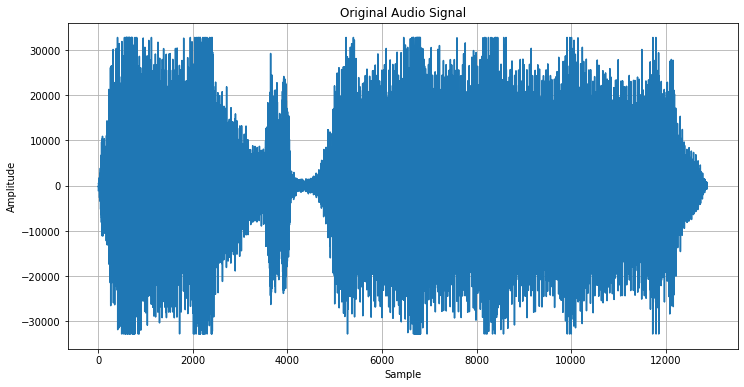

In [6]:
from scipy import fft 
import numpy as np
import matplotlib.pyplot as plt

# Plot the original signal
plt.figure(figsize=(12, 6))
plt.plot(y)
plt.title('Original Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

As you can see from the time-domain plot aboce, it would be difficult to separate the bird chirps from the train whistle directly from this mixed signal.

Let's try to separate them in the frequency-domain using the discrete fourier transform (since a train whistle and a bird chirp should have different frequency ranges)

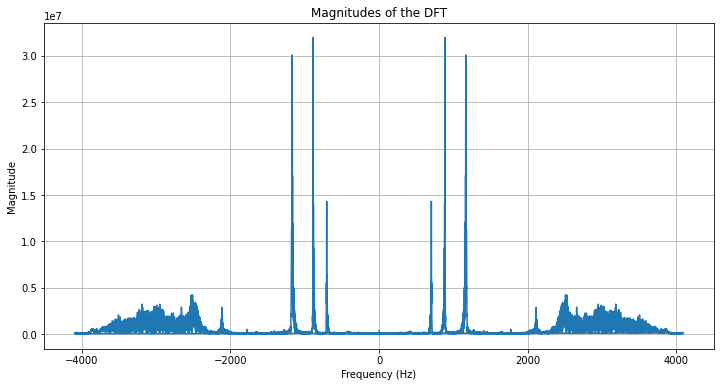

In [7]:
# Compute the DFT of the signal
Y = fft.fft(y)
frequencies = fft.fftfreq(len(Y), 1/Fs)
magnitudes = np.abs(Y)

# Plot the magnitudes of the DFT
plt.figure(figsize=(12, 6))
plt.plot(frequencies, magnitudes)
plt.title('Magnitudes of the DFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

In [8]:
# Choose a cutoff frequency (in Hz) by inspecting the frequency plot
cutoff_frequency = 1800 # Adjust this as necessary
p = int(cutoff_frequency / (Fs / len(Y)))  # calculate the corresponding index

# Design the low-pass filter
Q_lowpass = np.zeros_like(Y)
Q_lowpass[:p+1] = 1
Q_lowpass[-p:] = 1  # due to symmetry

# Apply the low-pass filter
Y_lowpass = Y * Q_lowpass

# Convert back to the time domain
y_lowpass = np.real(fft.ifft(Y_lowpass))

# Save and play the filtered signal
scipy.io.wavfile.write('train_sound.wav', Fs, y_lowpass.astype(np.int16))
lowpass_audio = Audio(y_lowpass, rate=Fs)
display(lowpass_audio)

# Design the high-pass filter
Q_highpass = np.ones_like(Y)
Q_highpass[:p+1] = 0
Q_highpass[-p:] = 0  # due to symmetry

# Apply the high-pass filter
Y_highpass = Y * Q_highpass

# Convert back to the time domain
y_highpass = np.real(fft.ifft(Y_highpass))

# Save and play the filtered signal
scipy.io.wavfile.write('bird_sound.wav', Fs, y_highpass.astype(np.int16))
highpass_audio = Audio(y_highpass, rate=Fs)
display(highpass_audio)

We've succeessfully serparated the train whistle and bird chirps. 

Let's plot each of the filtered signals, both the filtered frequency-domain data and the new time-domain data:

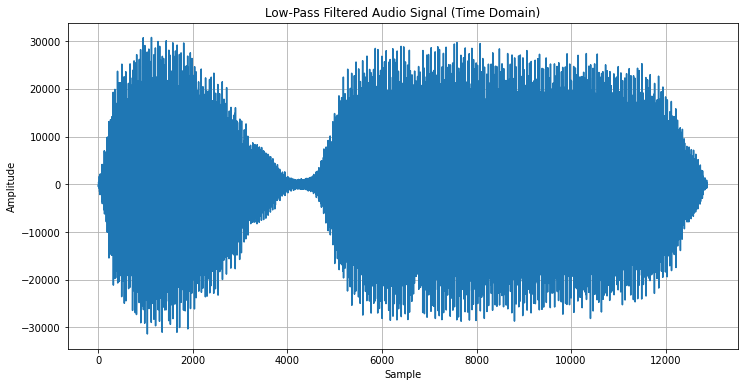

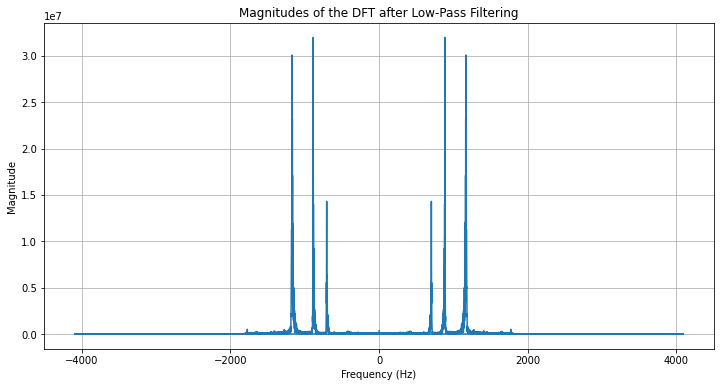

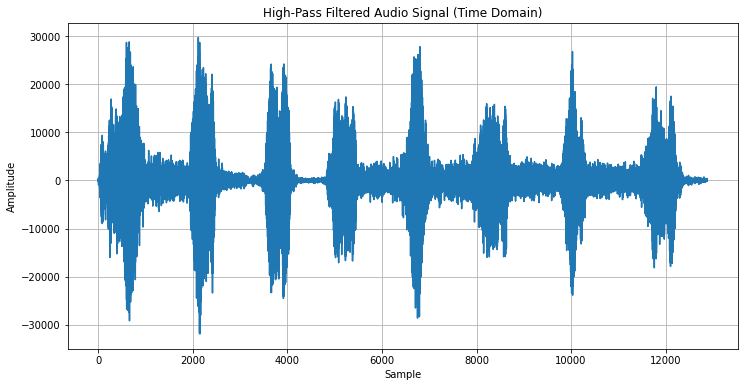

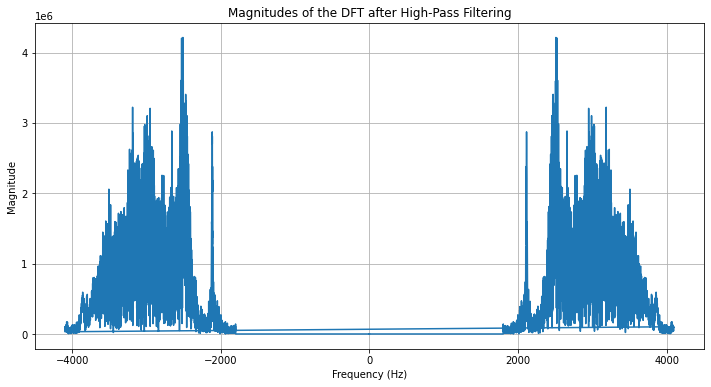

In [9]:
# Plot the time-domain signal after low-pass filtering
plt.figure(figsize=(12, 6))
plt.plot(y_lowpass)
plt.title('Low-Pass Filtered Audio Signal (Time Domain)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot the magnitudes of the DFT after low-pass filtering
magnitudes_lowpass = np.abs(Y_lowpass)
plt.figure(figsize=(12, 6))
plt.plot(frequencies, magnitudes_lowpass) 
plt.title('Magnitudes of the DFT after Low-Pass Filtering')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# Plot the time-domain signal after high-pass filtering
plt.figure(figsize=(12, 6))
plt.plot(y_highpass)
plt.title('High-Pass Filtered Audio Signal (Time Domain)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot the magnitudes of the DFT after high-pass filtering
magnitudes_highpass = np.abs(Y_highpass)
plt.figure(figsize=(12, 6))
plt.plot(frequencies, magnitudes_highpass)
plt.title('Magnitudes of the DFT after High-Pass Filtering')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()